In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
! pwd

/home/nbuser/Packaging


In [16]:
from fastai import *
from fastai.vision import *

from PIL import Image, ImageDraw, ImageFont, ImageColor
from random import randint

In [17]:
path = Path('/home/nbuser/Packaging')

In [18]:
data = ImageDataBunch.from_csv(path, "images", csv_labels='labels-fonts-plus-bg.csv', valid_pct=0.2,
        ds_tfms=get_transforms(do_flip=False), size=250).normalize(imagenet_stats)

data.classes

['125', '250', '500', 'background']

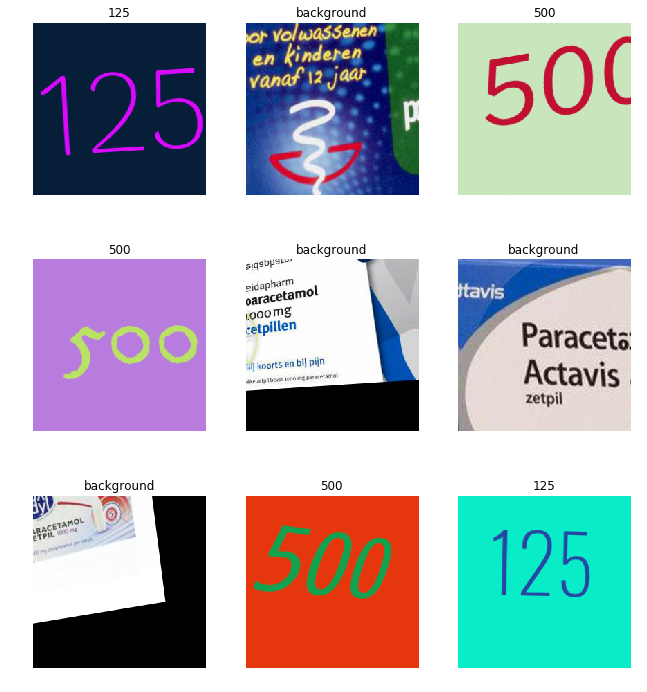

In [19]:
data.show_batch(3)

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [21]:
learn.fit_one_cycle(2)

Total time: 01:01
epoch  train_loss  valid_loss  error_rate
1      0.572023    0.109959    0.021164    (00:31)
2      0.271001    0.082342    0.019841    (00:29)



In [22]:
interp = ClassificationInterpretation.from_learner(learn)

In [23]:
learn.save('resnet34-fonts')

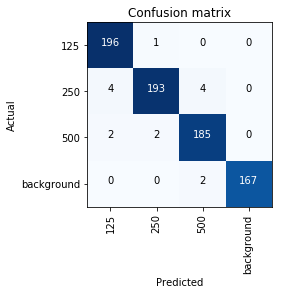

In [24]:
interp.plot_confusion_matrix()

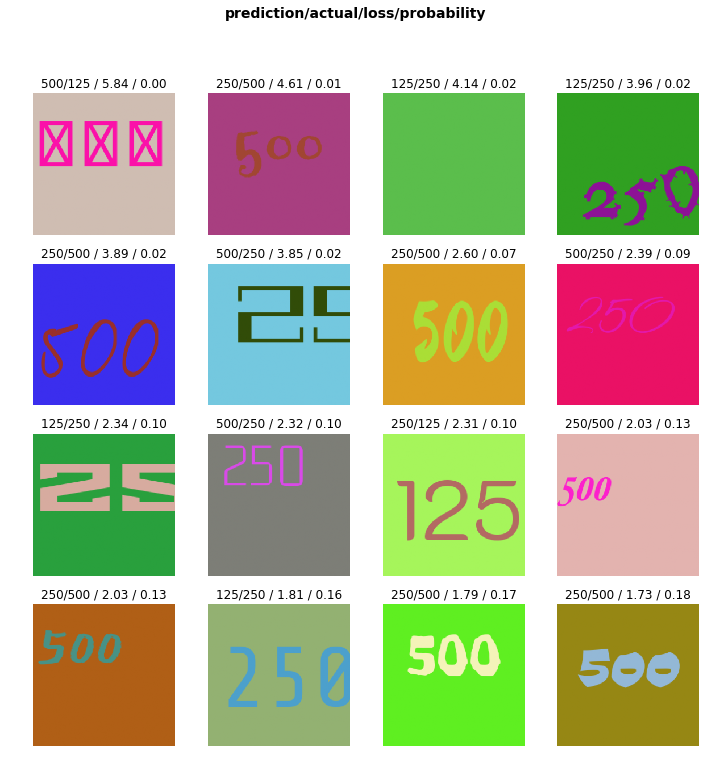

In [14]:
interp.plot_top_losses(16)